In [40]:
#%run 'init.ipynb'

In [34]:
N = 100000000 #events generated in the root stage
m_fv = 4 #tons

#some files are corrupted, therefore we exclude them 

def number_of_events(material):
    N = 100000000
    if material == "SS_OuterCryostat":
        n = {
        'U238' :N-3000 ,
        'Co60' : N, 
        'K40' : N,
        'Cs137' : N,
        'Th228' : 999*100000, 
        'Th232' : N,    
        'U235' : N,
        'Ra226' : N,
        }
    if material == "SS_InnerCryostat":
        n = {
        'U238' :N ,
        'Co60' : N, 
        'K40' : N,
        'Cs137' : N,
        'Th228' : N, 
        'Th232' : N,
        'U235' : N,
        'Ra226' : N,
        }
    if material == "OuterCryostatReflector":
        n = {
        'U238' :N-3000 ,
        'Co60' : N, 
        'K40' : N,
        'Cs137' : N,
        'Th228' : N-1000, 
        'U235' : N,
        'Th232' : N-2000,
        'Ra226' : N,
        }  
    if material == "SS_BellPlate":
        n = {
        'U238' :N ,
        'Co60' : N-2000, 
        'K40' : N,
        'Cs137' : N,
        'Th228' : N, 
        'U235' : N,
        'Th232' : N,
        'Ra226' : N,
        }   
    if material == "SS_BellSideWall":
        n = {
        'U238' :N ,
        'Co60' : 990*100000, 
        'K40' : N,
        'Cs137' : N,
        'Th228' : N, 
        'U235' : N,
        'Th232' : N,
        'Ra226' : N,
        }  
    if material ==  "Teflon_TPC":
        n = {
        'U238' :N ,
        'Co60' : N -1000, 
        'K40' : N,
        'Cs137' : N,
        'Th228' : N, 
        'U235' : N,
        'Th232' : N,
        'Ra226' : N,
        }  
    if material ==  "Copper_FieldShaperRing_":
        n = {
        'U238' :N ,
        'Co60' : N -1000, 
        'K40' : N,
        'Cs137' : N,
        'Th228' : N, 
        'U235' : N,
        'Th232' : N,
        'Ra226' : N,
        }    
    if (  (material == "Teflon_Pillar_") 
                                       | (material == "PmtTpc")          |(material == "SS_AnodeRing")     
                                       |( material =="Teflon_BottomTPC") 
                                       | (material == "Copper_TopRing")  |(material ==  "Copper_TopRing") 
                                       | (material =="Copper_TopRing")   |  (material == "Copper_FieldGuard_") 
                                       | (material == "Copper_BottomPmtPlate")
                                       ):
        n = {
        'U238' :N,
        'Co60' : N, 
        'K40' : N,
        'Cs137' : N,
        'Th228' : N, 
        'U235' : N,
        'Th232' : N,
        'Ra226' : N,
        }  
    
    return n



In [ ]:
#apply cuts to the dataframe: single scatter, fv, and evergy ROI. If evergy ROI is empty, extend it to 0-100 and re-normalize.
#assume the spectrum is flat 
def calculate_events(data, isotope):
    events_passing = 0
    ss = single_scatter(data)
    fv_ = fv(ss)
    energy_ = energy(fv_, 1, 12)
    events_passing = len(energy_)
    if events_passing == 0:
        en_enlarged = energy(fv_, 1, 200)
        if len(en_enlarged)!= 0:
            events_passing = (len(en_enlarged)*11)/199
        if len(en_enlarged) == 0:
            events_passing = 2.3
            return events_passing
        else:
            return events_passing
    else:
        return events_passing



In [18]:
def get_data(isotope, component):
    N = 100000000
    #return the correct root file to load according to the component
    df = pd.DataFrame()
    if component == "OuterCryostatShell":
        DATE = "XENONnT_20191202"
        material = "SS_OuterCryostat" 
        rootfile = '/userdata/arocchetti/rootfiles/' +'output_'+ material + '_' + isotope +'_FINAL' + '.root'
        data = get_xyz(rootfile)
        flange1, flange2, flange3, shell, elongation = divide_outercryo(data)
        fraction_shell, fraction_elong, fraction_flanges = outer_cryo_numbers(N)
        df = shell
        frac = fraction_shell 
    elif component == "OuterCryostat_Elongation":
        DATE = "XENONnT_20191202"
        material = "SS_OuterCryostat"
        rootfile = '/userdata/arocchetti/rootfiles/' +'output_'+ material + '_' + isotope +'_FINAL' + '.root'
        data = get_xyz(rootfile)
        flange1, flange2, flange3, shell, elongation = divide_outercryo(data)
        df = elongation
        fraction_shell, fraction_elong, fraction_flanges = outer_cryo_numbers(N)
        frac = fraction_elong 
    elif component == "OuterCryostat_flanges":
        DATE = "XENONnT_20191202"
        material = "SS_OuterCryostat"
        rootfile = '/userdata/arocchetti/rootfiles/' +'output_'+ material + '_' + isotope +'_FINAL' + '.root'
        data = get_xyz(rootfile)
        flange1, flange2, flange3, shell, elongation = divide_outercryo(data)
        flanges = pd.concat([flange1, flange2, flange3])
        df = flanges
        fraction_shell, fraction_elong, fraction_flanges = outer_cryo_numbers(N)
        frac = fraction_flanges
    elif component == "SS_InnerCryostatShell":
        material = "SS_InnerCryostat" 
        rootfile = '/userdata/arocchetti/rootfiles/' +'output_'+ material + '_' + isotope +'_FINAL' + '.root'
        data = get_xyz(rootfile)
        flange1_in, flange2_in, flange3_in, shell_in, elongation_in = divide_innercryo(data)
        flanges_in = pd.concat([flange1_in, flange2_in, flange3_in])
        fraction_shell, fraction_elong, fraction_flanges = inner_cryo_numbers(N)
        df = shell_in
        frac = fraction_shell
    elif component == "SS_InnerCryostatFlanges":
        material = "SS_InnerCryostat" 
        rootfile = '/userdata/arocchetti/rootfiles/' +'output_'+ material + '_' + isotope +'_FINAL' + '.root'
        data = get_xyz(rootfile)
        flange1_in, flange2_in, flange3_in, shell_in, elongation_in = divide_innercryo(data)
        flanges_in = pd.concat([flange1_in, flange2_in, flange3_in])
        fraction_shell, fraction_elong, fraction_flanges = inner_cryo_numbers(N)
        df = flanges_in
        frac = fraction_flanges
    elif component == "SS_InnerCryostat_bottomDome":
        material = "SS_InnerCryostat" 
        rootfile = '/userdata/arocchetti/rootfiles/' +'output_'+ material + '_' + isotope +'_FINAL' + '.root'
        data = get_xyz(rootfile)
        flange1_in, flange2_in, flange3_in, shell_in, elongation_in = divide_innercryo(data)
        flanges_in = pd.concat([flange1_in, flange2_in, flange3_in])
        fraction_shell, fraction_elong, fraction_flanges = inner_cryo_numbers(N)
        frac = fraction_elong
        df = elongation_in
    elif component == "SS_BellSideWall":
        material = 'SS_BellSideWall'
        rootfile = '/userdata/arocchetti/rootfiles/' +'output_'+ material + '_' + isotope +'_FINAL' + '.root'
        data = get_xyz(rootfile)
        bottomLip, bellWall = divide_bellWall(data)
        fraction_side, fraction_lip = bell_wall_numbers(N)
        frac = fraction_side
        df = bellWall
    elif component == "SS_BellSideWallBottomLip":
        material = 'SS_BellSideWall'
        rootfile = '/userdata/arocchetti/rootfiles/' +'output_'+ material + '_' + isotope +'_FINAL' + '.root'
        data = get_xyz(rootfile)
        bottomLip, bellWall = divide_bellWall(data)
        df = bottomLip 
        fraction_side, fraction_lip = bell_wall_numbers(N)
        frac = fraction_lip
    elif component == "Top_PTFE_Frame":
        material = 'SS_Teflon_TopElectrodesFrame'
        rootfile = '/userdata/arocchetti/rootfiles/' +'output_'+ material + '_' + isotope +'_FINAL' + '.root'
        data = get_xyz(rootfile)
        frac = 1
    elif component ==  "Teflon_TPC_Sliding":
        DATE = "XENONnT_20191202"
        material = "Teflon_TPC"
        rootfile = '/userdata/arocchetti/rootfiles/' +'output_'+ material + '_' + isotope +'_FINAL' + '.root'
        df = get_xyz(rootfile)
        frac = 100
    elif component ==  "Teflon_TPC_Fixed":
        DATE = "XENONnT_20191202"
        material = "Teflon_TPC"
        rootfile = '/userdata/arocchetti/rootfiles/' +'output_'+ material + '_' + isotope +'_FINAL' + '.root'
        df = get_xyz(rootfile)
        frac = 100
    else:
        material = component
        rootfile = '/userdata/arocchetti/rootfiles/' +'output_'+ material + '_' + isotope +'_FINAL' + '.root'
        df = get_xyz(rootfile)
        frac = 100
    return df, frac, material

In [19]:
def get_parameters(material):
    if material == "OuterCryostatShell":
        param = {
        'ids' : 'XENON1T',
        'mass' : 569.400, 
        'U238' : 2.4,
        'err_U238' : 0.7,
        'Ra226' : 0.64, 
        'err_Ra226' : 0,
        'Co60' : 9.7,
        'err_Co60' : 0.8,
        'K40' : 2.7, 
        'err_K40' : 0,
        'Cs137' : 0.64, 
        'err_Cs137' : 0, 
        'Th228' : 0.36, 
        'err_Th228' : 0, 
        'U235' : 0.11,
        'err_U235' : 0.03,
        'Th232' : 0.21,
        'err_Th232' : 0.06,   
        }
           
    if material == "OuterCryostat_Elongation":
        param = {
        'ids' : "SS_NiT_C5",
        'mass' : 61.500 ,
        'U238': 4,
        'err_U238' : 2,
        'Ra226' : 1.34 ,
        'err_Ra226' : 0.09,
        'Co60' : 0.61,
        'err_Co60' :0.05, 
        'K40' :1.4 ,
        'err_K40' :0.2,
        'Cs137' : 0.034,
        'err_Cs137' : 0.017,
        'Th228' : 0.57,
        'err_Th228' : 0.06,
        'U235' : 0.31,
        'err_U235' : 0, 
        'Th232' :1.2,
        'err_Th232' : 0.2,  
        }
        
    if material == "OuterCryostat_flanges":
        param = {
        'mass':413.220,
        'ids':"XENON1T",
        'U238':1.4,
        'err_U238':0.4,
        'Ra226':4 ,
        'err_Ra226': 0,
        'Co60':37.3,
        'err_Co60': 0.9,
        'K40':5.6,
        'err_K40': 0,
        'Cs137':1.5,
        'err_Cs137':0,
        'Th228': 4.5,
        'err_Th228':0.6,
        'U235':0.06,
        'err_U235': 0.02,
        'Th232' : 0.21,
        'err_Th232' : 0.06,  
        }
    if material == "SS_InnerCryostatShell":
        param = {
         'mass' : 452.470 ,
         'ids' : "SS_NiT_C1",
         'U238' : 3.7,
         'err_U238' : 0.6,
         'Ra226' : 0.3 ,
         'err_Ra226' : 0.1,
         'Co60' : 2.36,
         'err_Co60' : 0.21,
         'K40' : 1.6,
         'err_K40': 0.6,
         'Cs137' : 0.21,
         'err_Cs137' : 0,
         'Th228' : 0.5,
         'err_Th228' : 0.1,
         'U235' : 0.7,
         'err_U235' : 0.3 ,
         'Th232' : 0.10 ,
         'err_Th232' : 0.08,
        }
    
    if material == "SS_InnerCryostatFlanges":
        param = { 
        'mass' : 227.500, #gr
        'ids' : "XENON1T",
        'U238' : 1.4,
        'err_U238' : 0.4,
        'Ra226' : 4 ,
        'err_Ra226' : 0,
        'Co60' : 37.3,
        'err_Co60' : 0.9,
        'K40' : 5.6,
        'err_K40' : 0,
        'Cs137' : 1.5,
        'err_Cs137' : 0,
        'Th228' : 4.5,
        'err_Th228' : 0.6,
        'U235' :  0.06,
        'err_U235' : 0.02,
        'Th232' : 0.21,
        'err_Th232' : 0.06,
       }
        
    if material == "SS_InnerCryostat_bottomDome":
        param = {
        'ids' : "SS_NiT_C5",
        'mass' :86.800, #g
        'U238': 4,
        'err_U238' : 2,
        'Ra226' : 1.34 ,
        'err_Ra226' : 0.09,
        'Co60' : 0.61,
        'err_Co60' :0.05, 
        'K40' :1.4 ,
        'err_K40' :0.2,
        'Cs137' : 0.034,
        'err_Cs137' : 0.017,
        'Th228' : 0.57,
        'err_Th228' : 0.06,
        'U235' : 0.31,
        'err_U235' : 0, #up
        'Th232' :1.2,
        'err_Th232' : 0.2,
        }
            
    
    if material =="OuterCryostatReflector":
        param = {
        'ids' : "ePTFE-A",
        'mass' : 18.660, #gr from mc
        'U238' : 0.27,
        'err_U238' : 0.12,
        'Ra226' : 0 ,
        'err_Ra226' : 0,
        'Co60' :  0,
        'err_Co60' : 0,
        'K40' : 0,
        'err_K40' : 0,
        'Cs137' :  0,
        'err_Cs137' :  0,
        'Th228' : 0.12,
        'err_Th228' : 0.4,
        'U235' :  0.27*0.04,
        'err_U235' :0.12*0.04,
        'Th232' : 0.12,
        'err_Th232' : 0.4,
        }
        
    if material == "SS_BellPlate":
        param = {
         'mass' : 63.66881, 
         'ids' : "SS_NiT_C1",
         'U238' : 3.7,
         'err_U238' : 0.6,
         'Ra226' : 0.3 ,
         'err_Ra226' : 0.1,
         'Co60' : 2.36,
         'err_Co60' : 0.21,
         'K40' : 1.6,
         'err_K40': 0.6,
         'Cs137' : 0.21,
         'err_Cs137' : 0,
         'Th228' : 0.5,
         'err_Th228' : 0.1,
         'U235' : 0.7,
         'err_U235' : 0.3 ,
         'Th232' : 0.10 ,
         'err_Th232' : 0.08,
        }   
        
    if material == "SS_BellSideWall":
        param = {
        'ids' : "SS_NiT_C5",
        'mass' :33.35405, 
        'U238': 4,
        'err_U238' : 2,
        'Ra226' : 1.34 ,
        'err_Ra226' : 0.09,
        'Co60' : 0.61  ,
        'err_Co60' :0.05, 
        'K40' :1.4 ,
        'err_K40' :0.2,
        'Cs137' : 0.034,
        'err_Cs137' : 0.017,
        'Th228' : 0.57,
        'err_Th228' : 0.06,
        'U235' : 0.31,
        'err_U235' : 0, #up
        'Th232' :1.2,
        'err_Th232' : 0.2,
        }
        
    if material == "SS_BellSideWallBottomLip":
        param = { 
         'mass' : 7.12738, #gr
         'ids' :"SS_Nit_E1",
         'U238' :2.5,
         'err_U238' : 0.3,
         'Ra226' : 0.6 ,
         'err_Ra226' : 0.1,
         'Co60' :0.4,
         'err_Co60' :0.1,
         'K40' :0.24,
         'err_K40' : 0,
         'Cs137' : 0.16,
         'err_Cs137' : 0,
         'Th228' : 0.4,
         'err_Th228' : 0.1,
         'U235' : 0.56,
         'err_U235' : 0,
         'Th232' :  0.4,
         'err_Th232' : 0.1,
        }
        
    if material == "PmtTpc":
        param = {
        'ids' : "average 1T/nT",
        'mass' :494, 
        'U238': 10.20,
        'err_U238' : 3.26,
        'Ra226' : 0.49 ,
        'err_Ra226' : 0.15,
        'Co60' :0.94,  
        'err_Co60' : 0.27, 
        'K40' : 13.44  ,
        'err_K40' : 2.89,
        'Cs137' :0.17 ,
        'err_Cs137' : 0.09,
        'Th228' : 0.46,
        'err_Th228' : 0.19,
        'U235' : 10.20 *0.04,
        'err_U235' :3.26 *0.04, #up
        'Th232':0.46,
        'err_Th232' : 0.19, 
        }
 
    if material =="Copper_TopRing":
        param = {
        'ids' : "[[xenon:xenonnt:screening:gamma_results:copper_nt_fs#activity_summary|Table]]",
        'mass' : 53.39539 + 84.97121, #gr 
        'U238': 0.33,
        'err_U238' : 0,
        'Ra226' : 0.17 ,
        'err_Ra226' : 0,
        'Co60' : 0.031  ,
        'err_Co60' :0, 
        'K40' : 0.45,
        'err_K40' :0.14,
        'Cs137' : 0.054,
        'err_Cs137' : 0,
        'Th228' : 0.18,
        'err_Th228' : 0.05,
        'U235' :0.33*0.04 ,
        'err_U235' : 0, #up
        'Th232':0.18,
        'err_Th232' : 0.05, 
        }
    
        
    if material == "Teflon_Pillar_":
        param = {
         'mass' : 28.95696+8.49816, #gr
         'ids' : "PTFE_Pillars",
         'U238' : 0.14,
         'err_U238' : 0.07,
         'Ra226' : 0.043,
         'err_Ra226' : 0.0011,
         'Co60' : 0,
         'err_Co60' : 0,
         'K40' : 0.42,
         'err_K40' : 0,
         'Cs137' : 0.013,
         'err_Cs137' : 0,
         'Th228' : 0.042,
         'err_Th228' : 0,
         'U235' : 0.049,
         'err_U235' : 0,
         'Th232': 0.105,
         'err_Th232' : 0.016, 
        }
        
        
    if material == "SS_AnodeRing":
        param = {
        'mass' : (1760+1914+1595+1508+1207)/1000, #gr
        'ids' :"SS_Nit_E1",
         'U238' :2.5,
         'err_U238' : 0.3,
         'Ra226' : 0.6 ,
         'err_Ra226' : 0.1,
         'Co60' :0.4,
         'err_Co60' :0.1,
         'K40' :0.24,
         'err_K40' : 0,
         'Cs137' : 0.16,
         'err_Cs137' : 0,
         'Th228' : 0.4,
         'err_Th228' : 0.1,
         'U235' : 0.56,
         'err_U235' : 0,
         'Th232' :  0.4,
         'err_Th232' : 0.1,
        } 
        
    if material == "Teflon_BottomTPC":
        param = {
         'mass': 0.22553,
         'ids': "worse between PTFE_Holders and PTFE_Pillars",
         'U238': 0.14,
         'err_U238':  0.07,
         'Ra226': 0.064,
         'err_Ra226': 0,
         'Co60': 0,
         'err_Co60': 0,
         'K40':  7,
         'err_K40':  1,
         'Cs137':  0.22,
         'err_Cs137': 0,
         'Th228': 0.042,
         'err_Th228':  0,
         'U235':  0.070,
         'err_U235': 0,
         'Th232': 0.26,
         'err_Th232' : 0.12, 
        }
        
    if material == "Teflon_TPC_Sliding":
        param = { 
        'mass' : 7.57118, #kg
         'ids' : "PTFE_SlidingReflector",
         'U238' : 0.15,
         'err_U238' : 0.07,
         'Ra226' : 0.150 ,
         'err_Ra226' : 0.030,
         'Co60' :  0,
         'err_Co60' : 0,
         'K40' : 0.080,
         'err_K40' : 0.030,
         'Cs137' : 0.046,
         'err_Cs137' :  0,
         'Th228' : 0.079,
         'err_Th228' : 0,
         'U235' :  0.065,
         'err_U235' : 0,
         'Th232': 0.028,
         'err_Th232' : 0.0162,
        }
        
    if material == "Teflon_TPC_Fixed":
        param = { 
        'mass' : 11.6234, #gr
         'ids' : "PTFE_Ref2",
         'U238' : 0.032,
         'err_U238' :  0,
         'Ra226' :  0.032 ,
         'err_Ra226' : 0,
         'Co60' : 0,
         'err_Co60' :  0,
         'K40' : 8,
         'err_K40' :  1,
         'Cs137' :  0.066,
         'err_Cs137' :  0,
         'Th228' : 0.089,
         'err_Th228' : 0,
         'U235' :  0.078,
         'err_U235' :  0,
         'Th232': 0.12,
         'err_Th232' : 0.03,
        }
        
    if material == "Copper_FieldGuard_": 
        param = {
        'ids' : "CU_FS01",
         'mass' : 170.35648, #gr
         'U238' : 0.03,
         'err_U238' : 0.01,
         'Ra226' :  0 ,
         'err_Ra226' : 0,
         'Co60' : 0,
         'err_Co60' :  0,
         'K40' :  0,
         'err_K40' : 0,
         'Cs137' : 0,
         'err_Cs137' : 0,
         'Th228' : 0.010,
         'err_Th228' : 0.004,
         'U235' : 0.03 * 0.04 ,
         'err_U235' : 0.01 * 0.04,
         'Th232': 0.010,
         'err_Th232' :  0.004,
        }
        
    if material == "Copper_FieldShaperRing_":
        param = {
        'ids' : "CU_FSW",
        'mass' :8.49816,#gr
        'U238' : 3.31,
        'err_U238' : 0,
        'Ra226' : 9.08e-02 ,
        'err_Ra226' : 0,
        'Co60': 4.32e-01,  
        'err_Co60' : 3.79e-02,
        'K40' : 5.58e-01,
        'err_K40' : 2.33e-01,
        'Cs137' :3.49e-02 ,
        'err_Cs137' : 0,
        'Th228' : 3.61e-02,
        'err_Th228' :0,
        'U235' : 0.17,
        'err_U235' : 0  ,
        'Th232': 3.61e-02,
        'err_Th232' : 0,
        }
        
    if material == "Copper_BottomPmtPlate":
        param = {
        'ids' : "1t MC paper",
        'mass' : 84.9712 + 53.39539,#gr
        'U238' : 1.2,
        'err_U238' : 0,
        'Ra226' : 0.033 ,
        'err_Ra226' : 0,
        'Co60': 0.1,
        'err_Co60' : 0.01,
        'K40' : 0.28,
        'err_K40' : 0,
        'Cs137' : 0.016,
        'err_Cs137' : 0,
        'Th228' : 0.034,
        'err_Th228' :0,
        'U235' : 0.55,
        'err_U235' : 0  , 
        'Th232': 0.043,
        'err_Th232' : 0,
        }
        
    return param


In [20]:
def get_xyz_root(rootfile):
    file = uproot.open(rootfile)
    tree = file["events/events"]
    xp = tree["xp_pri"].array()
    df = tree.pandas.df([ "xp_pri", "yp_pri", "zp_pri"])
    df.columns = ['X', 'Y', 'Z_uc'] #rename 
    #Add some variables
    df['R'] = np.sqrt(df.X*df.X+ df.Y*df.Y)
    df['R2'] = df.R*df.R
    offset = 1488/2
    df['Z'] = df.Z_uc+ offset
    return df
#function to read the root file in chuncks 

def get_xyz(rootfile):
    dataframe = []
    for df in read_root(rootfile, "events/events", chunksize=1000000,
                             columns= ["xpri", "ypri", "zpri", "epri", "ns", "X", "Y", "Z", "Ed"],
                             where="ns==1"
                            ):#, unit = "chunks"):
        #print(df.X)
        x_values=[x[0] for x in df.X]
        y_values=[y[0] for y in df.Y]
        z_values=[z[0] for z in df.Z]
        df["X"]=x_values
        df["Y"]=y_values
        df["Z"]=z_values
        dataframe.append(df)
    
    dataframe=pd.concat(dataframe)
    dataframe.columns = ['xp', 'yp', 'zp_uc', "epri", "ns", "X", "Y", "Z_uc", "Ed"] #rename 
    offset = 1488/2
    dataframe['rp'] = np.sqrt(dataframe.xp**2+ dataframe.yp**2)
    dataframe['r2p'] = dataframe.rp*dataframe.rp
    dataframe['R'] = np.sqrt(dataframe.X**2+ dataframe.Y**2)
    dataframe['R2'] = (dataframe.R*dataframe.R)
    dataframe['Z'] = dataframe.Z_uc+offset
    dataframe['zp'] = dataframe.zp_uc+ offset
    return dataframe

In [22]:
def fv(data):
    data = data[data['R']<607.34]
    data = data[data.Z_uc < -106.0]
    data = data[data.Z_uc > -1315.0]
    return data



In [23]:
def single_scatter(data):
    data = data[data.ns==1]
    return data

In [24]:

def select_typepri(isotope):
    if isotope=="U238":
        n = 5
    elif isotope=="U235":
        n = 11
    elif isotope=="Th232":
        n = 5
    elif isotope=="Th228":
        n = 7
    elif isotope=="Ra226":
        n = 9
    else:
        n = 1
    return n 

In [26]:
from matplotlib.ticker import ScalarFormatter

In [27]:
def energy(data, min, max):
    data = data[(data.Ed<max) & (data.Ed>min)]
    return data

In [28]:
#outercryo
N = 100000000
def outer_cryo_numbers(N):
    shell = 569
    elong = 61.5
    flanges = 413.22
    mass = shell + elong + flanges
    fraction_shell = (N * shell/mass)*100/N
    fraction_elong = (N * elong/mass)*100/N
    fraction_flanges =  (N * flanges/mass)*100/N
    return fraction_shell, fraction_elong, fraction_flanges
    #print("fraction_shell %2.2f" %fraction_shell)
    #print("fraction_elong %2.2f" %fraction_elong)
    #print("fraction_flanges %2.2f" %fraction_flanges)
def inner_cryo_numbers(N):
    shell = 453.47
    elong = 227.5
    flanges = 86.0
    mass = shell + elong + flanges
    fraction_shell = ( shell/mass)*100
    fraction_elong = ( elong/mass)*100
    fraction_flanges =  (flanges/mass)*100
    return fraction_shell, fraction_elong, fraction_flanges
def bell_wall_numbers(N):
    bell_side = 33.35
    bell_lip = 7.12
    mass = bell_side+bell_lip
    fraction_side = ( bell_side/mass)*100
    fraction_lip = ( bell_lip/mass)*100
    return fraction_side, fraction_lip

In [29]:
#fraction_shell, fraction_elong, fraction_flanges = outer_cryo_numbers(N)
#print(fraction_shell, fraction_elong, fraction_flanges)

In [30]:
def return_frac(component):
    if component == "OuterCryostat_Elongation":
        fraction_shell, fraction_elong, fraction_flanges = outer_cryo_numbers(N)
        frac = fraction_elong 
    elif component == "OuterCryostatShell":
        fraction_shell, fraction_elong, fraction_flanges = outer_cryo_numbers(N)
        frac = fraction_shell
    elif component == "OuterCryostat_flanges":
        fraction_shell, fraction_elong, fraction_flanges = outer_cryo_numbers(N)
        frac = fraction_flanges
    elif component == "SS_InnerCryostatShell":
        fraction_shell, fraction_elong, fraction_flanges = inner_cryo_numbers(N)
        frac = fraction_shell
    elif component == "SS_InnerCryostatFlanges":
        fraction_shell, fraction_elong, fraction_flanges = inner_cryo_numbers(N)
        frac = fraction_flanges
    elif component == "SS_InnerCryostat_bottomDome":
        fraction_shell, fraction_elong, fraction_flanges = inner_cryo_numbers(N)
        frac = fraction_elong    
    elif component == "SS_BellSideWall":
        fraction_side, fraction_lip = bell_wall_numbers(N)
        frac = fraction_side 
    elif component == "SS_BellSideWallBottomLip":
        fraction_side, fraction_lip = bell_wall_numbers(N)
        frac = fraction_lip  
    else:
        frac=100
    return frac
      
      

In [31]:
#print out the radioactivity values. 
components = ["OuterCryostat_Elongation",
             "OuterCryostatShell", 
             "OuterCryostat_flanges",
             "SS_InnerCryostatShell",
             "SS_InnerCryostatFlanges",
             "SS_InnerCryostat_bottomDome",
             "OuterCryostatReflector",
             "SS_BellPlate",
             "SS_BellSideWall",
             "SS_BellSideWallBottomLip",
             "PmtTpc",
              "Copper_TopRing",
              "Copper_LowerRing",
              "Teflon_Pillar_",
              "SS_Electrodes",
              "Teflon_BottomTPC",
              "Teflon_TPC_Sliding",
              "Teflon_TPC_Fixed",
              "Copper_FieldGuard_",
              "Copper_FieldShaperRing_",
              "Top_PTFE_Frame",
              "Copper_BottomPmtPlate",
             "Copper_TopPmtPlate"]


isotope_array = ["U238",
                "Co60",
                "K40",
                "Cs137",
                "Th228",
                "U235",
                "Th232",
                "Ra226"
                ]
def only_cont(component): 
    p = get_parameters(component)
    screen_id = (p["ids"])
    total_str = ("|%s" %screen_id)
    for i in range(0, len(isotope_array)):
        isotope = isotope_array[i]
        
        mass = p['mass']
        contamination = p[isotope] 
        err = "err_"+isotope
        err = str(err)
        error_cont = p[err]
        contamination = p[isotope]
        if (contamination == 0):
            str_ = ("|<color #ed1c24>no contamination value</color>")
        else:
            str_ = ("|%2.2f  +- %2.2f" %(contamination, error_cont))
        total_str = total_str  + str_ 
               
    print("|" + component + total_str + "|")

def print_cont():
    print("^material ^ screening_id ^", isotope_array[0], "^", isotope_array[1], "^", isotope_array[2], "^",isotope_array[3], "^", isotope_array[4],"^",
             isotope_array[5], "^",isotope_array[6], "^",isotope_array[7], "^", )
    for component in components:
        if component == "Copper_LowerRing":
            print("|Copper_LowerRing|[[xenon:xenonnt:screening:gamma_results:copper_nt_fs#activity_summary|Table]]|0.33  +- 0.00|0.03  +- 0.00|0.45  +- 0.14|0.05  +- 0.00|0.18  +- 0.05|0.01  +- 0.00|0.18  +- 0.05|0.17  +- 0.00|")
        elif component =="SS_Electrodes":
            only_cont("SS_AnodeRing")
        elif component == "Top_PTFE_Frame":
            print("|Top_PTFE_Frame|PTFE_Pillars|0.14  +- 0.07|<color #ed1c24>no contamination value</color>|0.42  +- 0.00|0.01  +- 0.00|0.04  +- 0.00|0.05  +- 0.00|0.10  +- 0.02|0.04  +- 0.00|")
        elif component == "Copper_TopPmtPlate":
            print("|Copper_TopPmtPlate|1t MC paper|1.20  +- 0.00|0.10  +- 0.01|0.28  +- 0.00|0.02  +- 0.00|0.03  +- 0.00|0.55  +- 0.00|0.04  +- 0.00|0.03  +- 0.00|")
        else:

            only_cont(component)

#print_cont()      

In [32]:
def plot_total_contribution(bins, min_val, max_val ):

    bins_ = bins 
    min_ = min_val
    max_ = max_val
    values = np.zeros(bins) 
    for component in components:
        print("working on:" , component)
        for i in range(0, len(isotope_array)):
            isotope = isotope_array[i]
            data, frac, material = get_data(isotope, component)
            N_ = number_of_events(material)
            N = N_[isotope]
            data = fv(data)
            b = select_typepri(isotope) #later on with the good function
            n =  N*(frac/100)*(1/b) #n_gen * fraction in that component * chain_factor
            p = get_parameters(component)
            mass = p['mass']
            contamination = p[isotope] 
            if contamination > 0:
                contamination = p[isotope]/1000 
                time = n / (mass * contamination)
            else:          
                print("no contamination for ", isotope)
            time_weights = [1/time]*len(data)
            m, bins_plt, = np.histogram(data.Ed, bins = bins_, range = (min_, max_), weights = time_weights)            
            plt.yscale("log")              
            values = values + m
    return values, bins_plt

In [46]:
components = ["PmtTpc"]
#conv = 3.15*1e7 
#rate is in ev/s
 #1day=86400, divided by 4000 kg and 12 keV ROI 
values, bins_plt = plot_total_contribution(250, 0, 2500 ) #bins, min, max



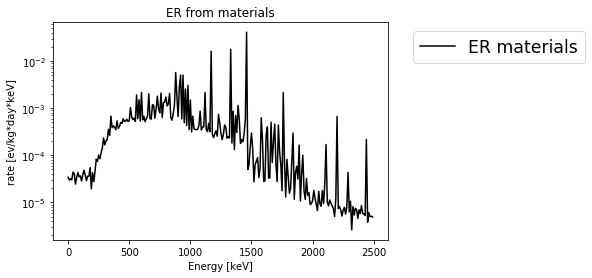

In [45]:
def make_spectrum(values, name):
    for i in range (0, len(values)):
        conv = 864/(40*12)
        values[i] = values[i]*conv
    plt.plot(bins_plt[:-1], values, "black", label = "ER materials")
    plt.legend(markerscale=10, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='xx-large')
    plt.yscale("log")
    plt.ylabel("rate [ev/kg*day*keV]")
    plt.xlabel("Energy [keV]")
    plt.title("ER from materials")
    plt.show() 
    map_ = values.tolist()
    data_map={'description': 'Preliminary background from materials .\nRate is in kg/d/KeV.\n \nArianna Rocchetti, Dec.2019\n', 
          'name': name,
          'timestamp': time.time(),
          'coordinate_system': [['E', [0, 2500, 250]]],
          'map': map_}
    string_name = name+".json"
    with open(string_name, 'w') as fp:
        json.dump(data_map, fp)


In [48]:
with open('spectrum.json') as json_file:
    dt = json.load(json_file)


In [49]:
values = dt["map"]
bins_plt = np.arange(0,2500,10)


In [52]:
print(len(values))
print(len(bins_plt))

250
250


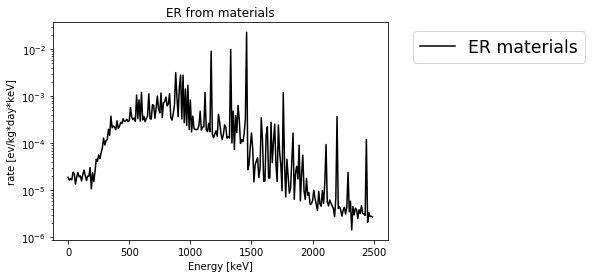

In [55]:
plt.plot(bins_plt, values, "black", label = "ER materials")
plt.legend(markerscale=10, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='xx-large')
plt.yscale("log")
plt.ylabel("rate [ev/kg*day*keV]")
plt.xlabel("Energy [keV]")
plt.title("ER from materials")
plt.show() 